# "Best-reply"-algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Setting up the game

This way of representing games gives us easy access to the payoffs (a1, b1, etc.). The P1 and P2 are ready to be analysed by numpy.

In [34]:
#     Row    and   Column    payout matrix
# | a1 | b1 |   | a2 | b2 |
# | c1 | d1 |   | c2 | d2 |

#Matching pennies
a1 = 1; b1 = -1
c1 = -1; d1 = 1

a2 = -1; b2 = 1
c2 = 1; d2 = -1

P1 = np.array([[a1, b1],
               [c1, d1]])

P2 = np.array([[a2, b2],
               [c2, d2]])

### The algorithm

Each player chooses the pure strategy with the highest expected payoff against what the other player has played so far on average.

In [35]:
def bestReply():
    rand1 = 0.3
    rand2 = 0.4
    P1replies = np.array([rand1, 1-rand1])
    P2replies = np.array([rand2, 1-rand2])

    P1plot = []
    P2plot = []

    N = 1000

    for i in range(N):
        P1payoff1 = P2replies[0] * a1 + P2replies[1] * b1
        P1payoff2 = P2replies[0] * c1 + P2replies[1] * d1

        P2payoff1 = P1replies[0] * a2 + P1replies[1] * c2
        P2payoff2 = P1replies[0] * b2 + P1replies[1] * d2

        if P1payoff1 > P1payoff2:
            P1replies += np.array([1, 0])
        else:
            P1replies += np.array([0, 1])

        if P2payoff1 > P2payoff2:
            P2replies += np.array([1, 0])
        else:
            P2replies += np.array([0, 1])

        P1plot.append(P1replies[0]/(i + 1))
        P2plot.append(P2replies[0]/(i + 1))
    
    return P1replies/N, P1replies/N, P1plot, P2plot

### Result

The players should now be playing a strategy which is a nash equilibrium.

In [36]:
P1replies, P2replies, P1plot, P2plot = bestReply()
print(f"P1: {P1replies/N}")
print(f"P2: {P2replies/N}")

P1: [0.0004953 0.0005057]
P2: [0.0004953 0.0005057]


We can see how it did by comparing with the result nashpy gives us:

In [37]:
rps = nash.Game(P1, P2)
eqs = rps.support_enumeration()
for equ in eqs:
    print(equ)

(array([0.5, 0.5]), array([0.5, 0.5]))


We can plot how the proportion of strategies chosen changed.

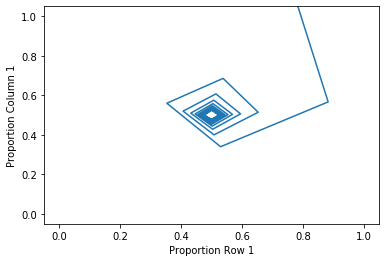

In [38]:
plt.plot(P1plot, P2plot)
plt.xlabel("Proportion Row 1")
plt.ylabel("Proportion Column 1")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.show()

Another way to plot the result of the algorithm.

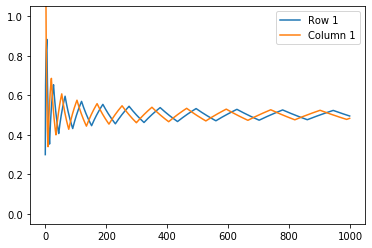

In [39]:
plt.plot(P1plot, label="Row 1")
plt.plot(P2plot, label="Column 1")

plt.ylim(-0.05, 1.05)
plt.legend()
plt.show()

### Testing other games

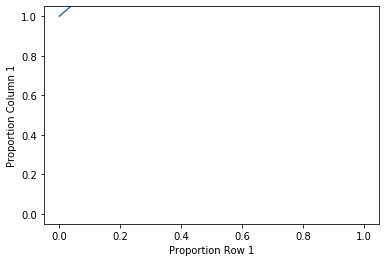

In [46]:
#Chicken - p.11
a1 = 2; b1 = 0; c1 = 4; d1 = -1
a2 = 2; b2 = 4; c2 = 0; d2 = -1

P1replies, P2replies, P1plot, P2plot = bestReply()

plt.plot(P1plot, P2plot)
plt.xlabel("Proportion Row 1")
plt.ylabel("Proportion Column 1")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.show()

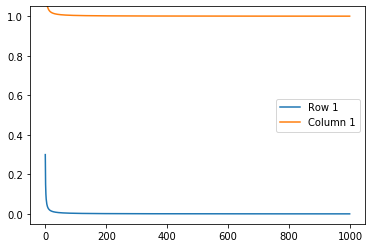

In [47]:
plt.plot(P1plot, label="Row 1")
plt.plot(P2plot, label="Column 1")

plt.ylim(-0.05, 1.05)
plt.legend()
plt.show()